In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as  px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv')
df

submission_date state  tot_cases  conf_cases  prob_cases  new_case  \
0          03/11/2021    KS     297229    241035.0     56194.0         0   
1          12/01/2021    ND     163565    135705.0     27860.0       589   
2          01/02/2022    AS         11         NaN         NaN         0   
3          11/22/2021    AL     841461    620483.0    220978.0       703   
4          05/30/2022    AK     251425         NaN         NaN         0   
...               ...   ...        ...         ...         ...       ...   
60055      02/09/2021    TX    2504556         NaN         NaN     13329   
60056      11/20/2020    FL     913561         NaN         NaN      8217   
60057      08/17/2020    NM      23500         NaN         NaN        92   
60058      06/17/2020    MS      24223     24038.0       185.0       521   
60059      05/07/2022    MA    1779829   1638144.0    141685.0         0   

       pnew_case  tot_death  conf_death  prob_death  new_death  pnew_death  \
0            0.0       4851         NaN         NaN          0         0.0   
1          220.0       1907         NaN         NaN          9         0.0   
2            0.0          0         NaN         NaN          0         0.0   
3          357.0      16377     12727.0      3650.0          7         3.0   
4            0.0       1252         NaN         NaN          0         0.0   
...          ...        ...         ...         ...        ...         ...   
60055     2676.0      43306         NaN         NaN        207         0.0   
60056     1677.0      19014         NaN         NaN         79         5.0   
60057        0.0        682         NaN         NaN          4         0.0   
60058        6.0       1191      1172.0        19.0          9         0.0   
60059        0.0      20334     19198.0      1136.0          0         0.0   

                   created_at consent_cases consent_deaths  
0      03/12/2021 03:20:13 PM         Agree            NaN  
1      12/02/2021 02:35:20 PM         Agree      Not agree  
2      01/03/2022 03:18:16 PM           NaN            NaN  
3      11/22/2021 12:00:00 AM         Agree          Agree  
4      05/31/2022 01:20:20 PM           NaN            NaN  
...                       ...           ...            ...  
60055  02/11/2021 12:00:00 AM     Not agree      Not agree  
60056  11/20/2020 12:00:00 AM     Not agree      Not agree  
60057  08/19/2020 12:00:00 AM           NaN      Not agree  
60058  06/19/2020 12:00:00 AM         Agree          Agree  
60059  05/09/2022 01:14:40 PM         Agree          Agree  

[60060 rows x 15 columns]

In [3]:
df.head(5)

submission_date state  tot_cases  conf_cases  prob_cases  new_case  \
0      03/11/2021    KS     297229    241035.0     56194.0         0   
1      12/01/2021    ND     163565    135705.0     27860.0       589   
2      01/02/2022    AS         11         NaN         NaN         0   
3      11/22/2021    AL     841461    620483.0    220978.0       703   
4      05/30/2022    AK     251425         NaN         NaN         0   

   pnew_case  tot_death  conf_death  prob_death  new_death  pnew_death  \
0        0.0       4851         NaN         NaN          0         0.0   
1      220.0       1907         NaN         NaN          9         0.0   
2        0.0          0         NaN         NaN          0         0.0   
3      357.0      16377     12727.0      3650.0          7         3.0   
4        0.0       1252         NaN         NaN          0         0.0   

               created_at consent_cases consent_deaths  
0  03/12/2021 03:20:13 PM         Agree            NaN  
1  12/02/2021 02:35:20 PM         Agree      Not agree  
2  01/03/2022 03:18:16 PM           NaN            NaN  
3  11/22/2021 12:00:00 AM         Agree          Agree  
4  05/31/2022 01:20:20 PM           NaN            NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60060 entries, 0 to 60059
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  60060 non-null  object 
 1   state            60060 non-null  object 
 2   tot_cases        60060 non-null  int64  
 3   conf_cases       34034 non-null  float64
 4   prob_cases       33962 non-null  float64
 5   new_case         60060 non-null  int64  
 6   pnew_case        56534 non-null  float64
 7   tot_death        60060 non-null  int64  
 8   conf_death       33273 non-null  float64
 9   prob_death       33273 non-null  float64
 10  new_death        60060 non-null  int64  
 11  pnew_death       56566 non-null  float64
 12  created_at       60060 non-null  object 
 13  consent_cases    50045 non-null  object 
 14  consent_deaths   51051 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 6.9+ MB


In [5]:
df['state'].unique()

array(['KS', 'ND', 'AS', 'AL', 'AK', 'RMI', 'PR', 'PW', 'NM', 'UT', 'SD',
       'OH', 'NYC', 'GU', 'OK', 'NY', 'MP', 'GA', 'PA', 'TX', 'MS', 'WA',
       'HI', 'TN', 'IN', 'FL', 'WV', 'IA', 'MA', 'CO', 'AR', 'SC', 'LA',
       'KY', 'MD', 'FSM', 'MI', 'CT', 'NJ', 'NE', 'DE', 'VA', 'OR', 'MN',
       'AZ', 'WY', 'NV', 'VT', 'WI', 'CA', 'NC', 'IL', 'DC', 'MO', 'MT',
       'RI', 'ME', 'NH', 'ID', 'VI'], dtype=object)

###Describing my column names and stating the relevant ones

#1. submission_date is very relevant, hence created_at column will be considered irrelevant

#2. tot_cases column is the sum of conf_cases and prob_cases. prob_cases is not relevant because we are only interested in the cov_19 related cases not other ill-health issues, therefore, conf_cases column is considered relevant

#3. new_cases column is a relevant column which will be used to access the rate of spread of the disease

#4. pnew_cases will be considered irrelevant because the cases might not be covid related

#5. tot_death is the sum of the conf_death and prob_death, but we are only interested in conf_death column

#6. new_death column is also considered relevant as it shows death arising from the new_cases

#7. pnew_death is the number if death arising from pnew_cases which might not be covid related, hence it is irrelevant

#8. consent_cases and consent_death are the approved data submission by the authority

In [6]:
#to drop irrelevant columns
df = df.drop(['tot_cases', 'prob_cases', 'pnew_case', 'tot_death', 'pnew_death', 'created_at'], axis=1)
df

submission_date state  conf_cases  new_case  conf_death  prob_death  \
0          03/11/2021    KS    241035.0         0         NaN         NaN   
1          12/01/2021    ND    135705.0       589         NaN         NaN   
2          01/02/2022    AS         NaN         0         NaN         NaN   
3          11/22/2021    AL    620483.0       703     12727.0      3650.0   
4          05/30/2022    AK         NaN         0         NaN         NaN   
...               ...   ...         ...       ...         ...         ...   
60055      02/09/2021    TX         NaN     13329         NaN         NaN   
60056      11/20/2020    FL         NaN      8217         NaN         NaN   
60057      08/17/2020    NM         NaN        92         NaN         NaN   
60058      06/17/2020    MS     24038.0       521      1172.0        19.0   
60059      05/07/2022    MA   1638144.0         0     19198.0      1136.0   

       new_death consent_cases consent_deaths  
0              0         Agree            NaN  
1              9         Agree      Not agree  
2              0           NaN            NaN  
3              7         Agree          Agree  
4              0           NaN            NaN  
...          ...           ...            ...  
60055        207     Not agree      Not agree  
60056         79     Not agree      Not agree  
60057          4           NaN      Not agree  
60058          9         Agree          Agree  
60059          0         Agree          Agree  

[60060 rows x 9 columns]

In [7]:
#checking for NaN
df.isnull()

submission_date  state  conf_cases  new_case  conf_death  prob_death  \
0                False  False       False     False        True        True   
1                False  False       False     False        True        True   
2                False  False        True     False        True        True   
3                False  False       False     False       False       False   
4                False  False        True     False        True        True   
...                ...    ...         ...       ...         ...         ...   
60055            False  False        True     False        True        True   
60056            False  False        True     False        True        True   
60057            False  False        True     False        True        True   
60058            False  False       False     False       False       False   
60059            False  False       False     False       False       False   

       new_death  consent_cases  consent_deaths  
0          False          False            True  
1          False          False           False  
2          False           True            True  
3          False          False           False  
4          False           True            True  
...          ...            ...             ...  
60055      False          False           False  
60056      False          False           False  
60057      False           True           False  
60058      False          False           False  
60059      False          False           False  

[60060 rows x 9 columns]

In [8]:
df.isnull().sum()

submission_date        0
state                  0
conf_cases         26026
new_case               0
conf_death         26787
prob_death         26787
new_death              0
consent_cases      10015
consent_deaths      9009
dtype: int64

In [9]:
#to remove rows with null values
cov = df.dropna()
cov

submission_date state  conf_cases  new_case  conf_death  prob_death  \
3          11/22/2021    AL    620483.0       703     12727.0      3650.0   
5          05/17/2020   RMI         0.0         0         0.0         0.0   
7          09/04/2021    PR    144788.0       667      2482.0       429.0   
10         01/01/2022    UT    636992.0         0      3635.0       152.0   
12         04/03/2021    OH    866822.0      2293     18646.0         0.0   
...               ...   ...         ...       ...         ...         ...   
60044      09/04/2022    MS    492258.0         0      8425.0      4369.0   
60046      02/20/2020    AL         0.0         0         0.0         0.0   
60048      09/25/2021   RMI         4.0         0         0.0         0.0   
60058      06/17/2020    MS     24038.0       521      1172.0        19.0   
60059      05/07/2022    MA   1638144.0         0     19198.0      1136.0   

       new_death consent_cases consent_deaths  
3              7         Agree          Agree  
5              0         Agree          Agree  
7              8         Agree          Agree  
10             0         Agree          Agree  
12             0         Agree          Agree  
...          ...           ...            ...  
60044          0         Agree          Agree  
60046          0         Agree          Agree  
60048          0         Agree          Agree  
60058          9         Agree          Agree  
60059          0         Agree          Agree  

[28048 rows x 9 columns]

In [10]:
#to convert the float columns to int
cov_19 = cov.astype({"conf_cases":'int', "conf_death":'int', "prob_death":'int'}) 
cov_19

submission_date state  conf_cases  new_case  conf_death  prob_death  \
3          11/22/2021    AL      620483       703       12727        3650   
5          05/17/2020   RMI           0         0           0           0   
7          09/04/2021    PR      144788       667        2482         429   
10         01/01/2022    UT      636992         0        3635         152   
12         04/03/2021    OH      866822      2293       18646           0   
...               ...   ...         ...       ...         ...         ...   
60044      09/04/2022    MS      492258         0        8425        4369   
60046      02/20/2020    AL           0         0           0           0   
60048      09/25/2021   RMI           4         0           0           0   
60058      06/17/2020    MS       24038       521        1172          19   
60059      05/07/2022    MA     1638144         0       19198        1136   

       new_death consent_cases consent_deaths  
3              7         Agree          Agree  
5              0         Agree          Agree  
7              8         Agree          Agree  
10             0         Agree          Agree  
12             0         Agree          Agree  
...          ...           ...            ...  
60044          0         Agree          Agree  
60046          0         Agree          Agree  
60048          0         Agree          Agree  
60058          9         Agree          Agree  
60059          0         Agree          Agree  

[28048 rows x 9 columns]

In [11]:
#to remove rows with zero values on conf_cases
filt = cov_19[cov_19['conf_cases']>0]
filt

submission_date state  conf_cases  new_case  conf_death  prob_death  \
3          11/22/2021    AL      620483       703       12727        3650   
7          09/04/2021    PR      144788       667        2482         429   
10         01/01/2022    UT      636992         0        3635         152   
12         04/03/2021    OH      866822      2293       18646           0   
13         10/16/2022   NYC     2452178      5934       36503        5655   
...               ...   ...         ...       ...         ...         ...   
60039      08/31/2021    PR      142834       512        2447         419   
60044      09/04/2022    MS      492258         0        8425        4369   
60048      09/25/2021   RMI           4         0           0           0   
60058      06/17/2020    MS       24038       521        1172          19   
60059      05/07/2022    MA     1638144         0       19198        1136   

       new_death consent_cases consent_deaths  
3              7         Agree          Agree  
7              8         Agree          Agree  
10             0         Agree          Agree  
12             0         Agree          Agree  
13             8         Agree          Agree  
...          ...           ...            ...  
60039         15         Agree          Agree  
60044          0         Agree          Agree  
60048          0         Agree          Agree  
60058          9         Agree          Agree  
60059          0         Agree          Agree  

[27020 rows x 9 columns]

In [12]:
#i want to check the trend of cov_19 cases among the 3 years under consideration, hence i need to sort the records by years
# Convert (submission_date) object type to datetime object
filt['submission_date'] = pd.to_datetime(filt['submission_date'])

print(filt.dtypes)


submission_date    datetime64[ns]
state                      object
conf_cases                  int32
new_case                    int64
conf_death                  int32
prob_death                  int32
new_death                   int64
consent_cases              object
consent_deaths             object
dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_5260\4220415838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt['submission_date'] = pd.to_datetime(filt['submission_date'])


In [13]:
#to check if all data were approved by the authority i.e. to check if there are any "Disagree"
appr = filt.consent_cases.value_counts()
print(appr)
print()

#filt[filt['consent_deaths']=='Agree']
appr2 = filt.consent_deaths.value_counts()
appr2


Agree    27020
Name: consent_cases, dtype: int64



Agree    27020
Name: consent_deaths, dtype: int64

In [14]:
filt.shape

(27020, 9)

In [15]:
#to check for unique data
filt.nunique()

submission_date     1001
state                 31
conf_cases         21481
new_case            6069
conf_death         12623
prob_death          4326
new_death            408
consent_cases          1
consent_deaths         1
dtype: int64

In [16]:
#number of data entries per state
filt.state.value_counts()

DE     1001
MI      962
NYC     961
CO      961
NC      960
MS      959
KY      956
VA      954
AL      952
ME      951
TN      950
PR      941
MP      933
WY      917
ID      917
OH      917
CT      914
OR      913
AZ      913
WI      913
IL      913
MT      913
GA      912
UT      912
MA      890
OK      776
RMI     721
NJ      661
CA      634
FSM     436
NE      407
Name: state, dtype: int64

In [17]:
#total number of confirmed cases of cov_19 across USA
filt.conf_cases.sum()

16686249118

In [18]:
#total number of confirmed death of cov_19 across USA
filt.conf_death.sum()

257961069

In [19]:
#to sort out the total number of confirmed cases for states
state_tot=filt.groupby('state')['conf_cases'].sum().head(10)
state_tot

state
AL      481667578
AZ      895458147
CA     1297547205
CO      613300769
CT      337607937
DE      115566879
FSM        906807
GA     1004804883
ID      173958240
IL     1561742441
Name: conf_cases, dtype: int32

In [20]:
#to get the first 10 states with highest cov_19 cases
state_tot.sort_values(ascending=False).head(10)

state
IL     1561742441
CA     1297547205
GA     1004804883
AZ      895458147
CO      613300769
AL      481667578
CT      337607937
ID      173958240
DE      115566879
FSM        906807
Name: conf_cases, dtype: int32

# The states with highest covid cases include; Illinois, California, North Carolina, Ohio, Michigan, Georgia, New York City, New Jersey, Arizona,Tennessee


In [21]:
#to sort out the total number of confirmed deaths for states
death_tot=filt.groupby('state')['conf_death'].sum()
death_tot

state
AL      8668755
AZ     14255146
CA     20529490
CO      5875957
CT      5903996
DE      1529707
FSM        2382
GA     17374449
ID      2026778
IL     20230266
KY      7172097
MA     14194719
ME       937871
MI     18483885
MP        11108
MS      5002470
MT      1679299
NC     11801049
NE      1279308
NJ     17265102
NYC    24910276
OH     19165286
OK      5581024
OR      3446549
PR      1957839
RMI        1053
TN      9890449
UT      2289304
VA      8874443
WI      6762016
WY       858996
Name: conf_death, dtype: int32

# The states with highest covid death include; New York City, California, Illinois, Ohio, Michigan, Georgia, New Jersey, Arizona, Massachusetts, North Carolina

In [22]:
#to get the first 10 states with highest cov_19 deaths
death_tot.sort_values(ascending=False)

state
NYC    24910276
CA     20529490
IL     20230266
OH     19165286
MI     18483885
GA     17374449
NJ     17265102
AZ     14255146
MA     14194719
NC     11801049
TN      9890449
VA      8874443
AL      8668755
KY      7172097
WI      6762016
CT      5903996
CO      5875957
OK      5581024
MS      5002470
OR      3446549
UT      2289304
ID      2026778
PR      1957839
MT      1679299
DE      1529707
NE      1279308
ME       937871
WY       858996
MP        11108
FSM        2382
RMI        1053
Name: conf_death, dtype: int32

In [23]:
#recorded confirmed cases by date of submission
filt.groupby(['submission_date', 'state'])['conf_cases'].sum()

submission_date  state
2020-01-22       DE             4
2020-01-23       DE             5
2020-01-24       DE             5
2020-01-25       DE             5
2020-01-26       DE             5
                           ...   
2022-10-18       TN       1737249
                 UT       1041651
                 VA       1490236
                 WI       1658241
                 WY        139079
Name: conf_cases, Length: 27020, dtype: int32

In [24]:
#recorded new cases by submission date
filt.groupby(['submission_date', 'state'])['new_case'].sum()

submission_date  state
2020-01-22       DE          4
2020-01-23       DE          1
2020-01-24       DE          0
2020-01-25       DE          0
2020-01-26       DE          0
                          ... 
2022-10-18       TN          0
                 UT          0
                 VA        942
                 WI       1156
                 WY        397
Name: new_case, Length: 27020, dtype: int64

In [25]:
#total recorded new cases across states
filt.groupby('state')['new_case'].sum()

state
AL     1530803
AZ     2272916
CA     4708036
CO     1665114
CT      875971
DE      311538
FSM      22525
GA     2884621
ID      496596
IL     3760372
KY     1602633
MA     2026085
ME      294927
MI     2873184
MP       13202
MS      919938
MT      310615
NC     3229459
NE      269385
NJ     2266627
NYC    2912489
OH     3150844
OK     1140074
OR      900475
PR      968623
RMI      15389
TN     2331356
UT     1038597
VA     2106527
WI     1878929
WY      177538
Name: new_case, dtype: int64

# To show the trend of covid new cases & new deaths in USA 

Text(0, 0.5, 'new_case')

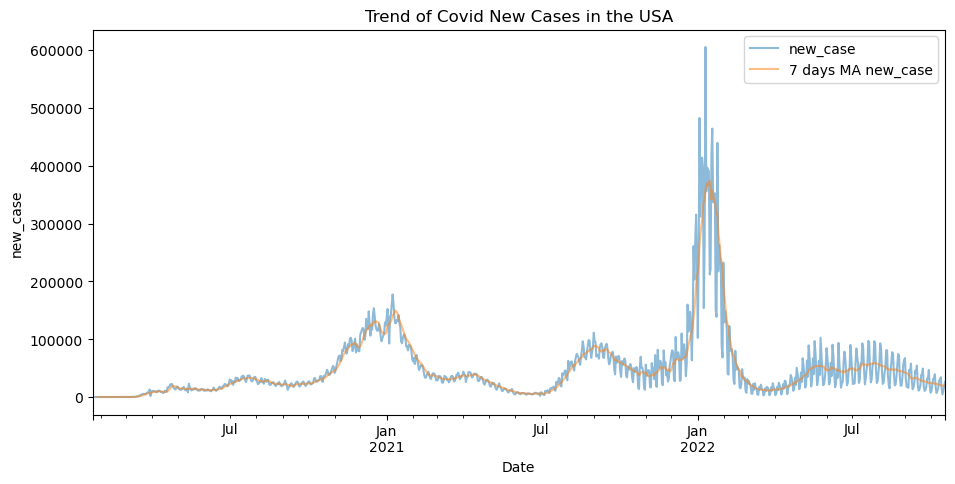

In [26]:
filt2 = filt.copy()
filt2 = filt.copy()
filt2.submission_date = pd.to_datetime(filt2['submission_date'])
filt2 = filt2.groupby('submission_date').sum()

filt2['7 days MA new_case'] = 0
#Moving average of new cases with window=10
filt2['7 days MA new_case'] = filt2['new_case'].rolling(7).mean()
filt2[['new_case', '7 days MA new_case']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Trend of Covid New Cases in the USA')
plt.xlabel('Date')
plt.ylabel('new_case')


In [27]:
#recorded new deaths by submission date
filt.groupby(['submission_date', 'state'])['new_death'].sum()

submission_date  state
2020-01-22       DE        0
2020-01-23       DE        0
2020-01-24       DE        0
2020-01-25       DE        0
2020-01-26       DE        0
                          ..
2022-10-18       TN        0
                 UT        0
                 VA       16
                 WI        8
                 WY        2
Name: new_death, Length: 27020, dtype: int64

In [28]:
#total recorded new death across the states
filt.groupby('state')['new_death'].sum()

state
AL     20525
AZ     31516
CA     71408
CO     13373
CT     10437
DE      3109
FSM       55
GA     39221
ID      5159
IL     38608
KY     17225
MA     22756
ME      2629
MI     33592
MP        41
MS     11689
MT      3473
NC     26923
NE      1816
NJ     17564
NYC    42178
OH     35950
OK     12828
OR      8550
PR      5206
RMI       17
TN     25492
UT      4995
VA     22057
WI     15163
WY      1905
Name: new_death, dtype: int64

Text(0, 0.5, 'new_death')

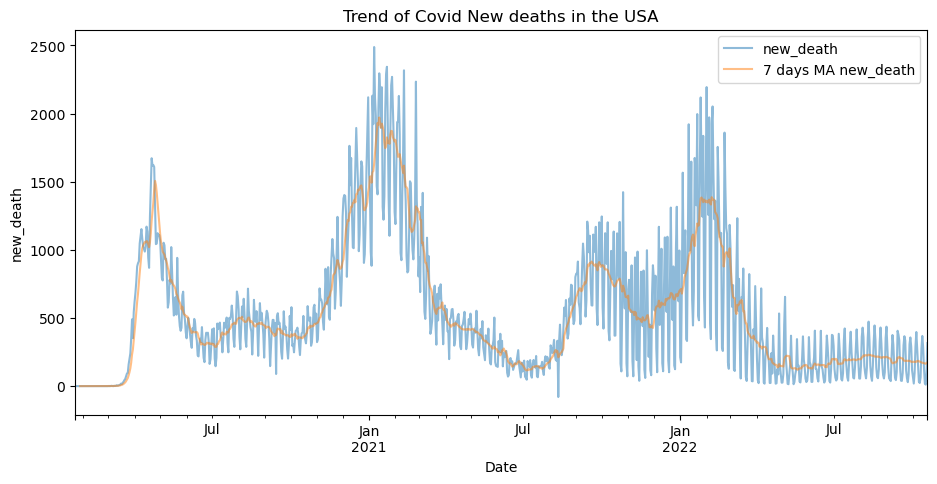

In [29]:
filt2 = filt.copy()
filt2 = filt.copy()
filt2.submission_date = pd.to_datetime(filt2['submission_date'])
filt2 = filt2.groupby('submission_date').sum()

filt2['7 days MA new_death'] = 0
#Moving average of new deaths with window=10
filt2['7 days MA new_death'] = filt2['new_death'].rolling(7).mean()
filt2[['new_death', '7 days MA new_death']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Trend of Covid New deaths in the USA')
plt.xlabel('Date')
plt.ylabel('new_death')


# TO SHOW IF THERE IS ANY RELATIONSHIP BETWEEN THE NUMBER OF CASES AND DEATHS

In [30]:
#creating a new dataframe for the top ten states with highest covid confirmed cases, using the following columns; state, conf_cases, conf_death, new_case, new_death
data = {'state': ['IL', 'CA', 'NC', 'OH', 'MI', 'GA', 'NYC', 'NJ', 'AZ', 'TN'], 
      'conf_cases': [1561742441, 1297547205, 1062713398, 1032920550, 1023663747, 1004804883, 964875965, 916255000, 895458147, 784828907],
     'conf_death': [20230266, 20529490, 11801049, 19165286, 18483885, 17374449, 24910276, 17265102, 14255146, 9890449],
     'new_case': [3760372, 4708036, 3229459, 3150844, 2873184, 2884621, 2912489, 2266627, 2272916, 2331356],
    'new_death': [38608, 71408, 26923, 35950, 33592, 39221, 42178, 17564, 31516, 25492]}  
top_ten = pd.DataFrame(data)
top_ten

state  conf_cases  conf_death  new_case  new_death
0    IL  1561742441    20230266   3760372      38608
1    CA  1297547205    20529490   4708036      71408
2    NC  1062713398    11801049   3229459      26923
3    OH  1032920550    19165286   3150844      35950
4    MI  1023663747    18483885   2873184      33592
5    GA  1004804883    17374449   2884621      39221
6   NYC   964875965    24910276   2912489      42178
7    NJ   916255000    17265102   2266627      17564
8    AZ   895458147    14255146   2272916      31516
9    TN   784828907     9890449   2331356      25492

In [31]:
fig = px.bar(top_ten, x='state', y='conf_cases',color='conf_cases', 
             title='Top 10 states with highest confirmed Cases')
fig.show()

In [32]:
fig = px.bar(top_ten, x='state', y='conf_death',color='conf_death', 
             title='Top 10 states with highest number of confirmed Deaths')
fig.show()

In [33]:
fig = px.bar(top_ten, x='state', y='new_case',color='new_case', 
             title='Top 10 states with highest number of new Cases')
fig.show()

In [34]:
fig = px.bar(top_ten, x='state', y='new_death',color='new_death', 
             title='Top 10 states with highest number of New Death')
fig.show()

In [35]:
comp = filt.groupby(['state'])[['conf_cases','conf_death','new_case', 'new_death']].sum()
comp.sort_values(['conf_cases'], ascending=False, inplace=True)
comparison_of_ten = comp.head(10)
comparison_of_ten

conf_cases  conf_death  new_case  new_death
state                                             
IL     1561742441    20230266   3760372      38608
CA     1297547205    20529490   4708036      71408
NC     1062713398    11801049   3229459      26923
OH     1032920550    19165286   3150844      35950
MI     1023663747    18483885   2873184      33592
GA     1004804883    17374449   2884621      39221
NYC     964875965    24910276   2912489      42178
NJ      916255000    17265102   2266627      17564
AZ      895458147    14255146   2272916      31516
TN      784828907     9890449   2331356      25492

# To create a better visualization on the comparsion among conf_cases, conf_death, new_case and new_death, i had to make:

conf_cases to be in multiple of 10000

conf_death to be in multiple of 1000

new_case to be in multiple of 100

In [36]:
anchos = [0.2] * 10
fig = go.Figure()
fig.add_trace(go.Bar(x = comparison_of_ten.index,
                     y = comparison_of_ten['conf_cases']/10000, 
                     width = anchos, name = 'Confirmed Cases'))
fig.add_trace(go.Bar(x = comparison_of_ten.index,
                     y = comparison_of_ten['conf_death']/1000, 
                     width = anchos, name = 'Confirmed Deaths'))
fig.add_trace(go.Bar(x = comparison_of_ten.index,
                     y = comparison_of_ten['new_case']/100, 
                     width = anchos, name = 'New Cases'))
fig.add_trace(go.Bar(x = comparison_of_ten.index,
                     y = comparison_of_ten['new_death'], 
                     width = anchos, name = 'New Deaths'))

fig.update_layout(title =  "TOP TEN STATES IN USA WITH HIGHEST COVID CASES",
                  barmode = 'group', title_font_size = 20)
fig.update_xaxes(title_text = 'state')
fig.update_yaxes(title_text = "Covid Cases")
# fig.write_image(path + "figclust1.png")
fig.show()


# COMPARE THE RATE (TREND) OF DEATH AMONG THE SELECTED STATE BETWEEN THE YEARS

In [37]:
#to filter the covid records of the ten states that were mostly affected by cov_19
filt_data = filt[(filt.state=='IL')| (filt.state=='CA')|(filt.state=='MI')|(filt.state=='NC')|(filt.state=='NYC')|
                 (filt.state=='OH')|(filt.state=='GA')|(filt.state=='NJ')|(filt.state=='AZ')|(filt.state=='TN')]
filt_data

submission_date state  conf_cases  new_case  conf_death  prob_death  \
12         2021-04-03    OH      866822      2293       18646           0   
13         2022-10-16   NYC     2452178      5934       36503        5655   
22         2021-09-23   NYC      881626      1755       28965        5188   
26         2020-07-20    GA      143697      2766        3176           0   
28         2022-06-06   NYC     2141413      2873       34946        5539   
...               ...   ...         ...       ...         ...         ...   
60014      2022-07-02    GA     2051117         0       32072        6507   
60016      2021-05-17    OH      915141       729       19528           0   
60022      2021-08-20    GA     1019585      9581       19179        3020   
60023      2020-11-03    GA      363890      2049        8029           0   
60025      2021-12-25   NYC     1080556         0       29978        5194   

       new_death consent_cases consent_deaths  
12             0         Agree          Agree  
13             8         Agree          Agree  
22            20         Agree          Agree  
26             3         Agree          Agree  
28            22         Agree          Agree  
...          ...           ...            ...  
60014          0         Agree          Agree  
60016          0         Agree          Agree  
60022         48         Agree          Agree  
60023         30         Agree          Agree  
60025          0         Agree          Agree  

[8783 rows x 9 columns]

Text(0, 0.5, 'conf_death')

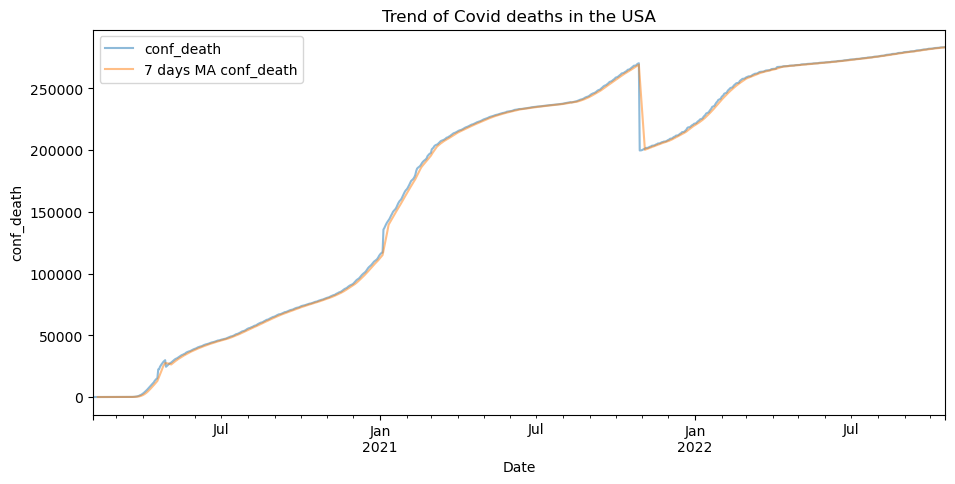

In [38]:
filt_data2 = filt_data.copy()
filt_data2 = filt_data.copy()
filt_data2.submission_date = pd.to_datetime(filt_data2['submission_date'])
filt_data2 = filt_data2.groupby('submission_date').sum()

filt_data2['7 days MA conf_death'] = 0
#Moving average of new deaths with window=10
filt_data2['7 days MA conf_death'] = filt_data2['conf_death'].rolling(7).mean()
filt_data2[['conf_death', '7 days MA conf_death']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Trend of Covid deaths in the USA')
plt.xlabel('Date')
plt.ylabel('conf_death')

# TO CHECK THE STATE WITH THE HIGHEST CURE RATIO

The state that has highest cure ratio is that state with the lowest value of the ratio of conf_death to conf_cases

In [39]:
comp = filt.groupby(['state'])[['conf_cases','conf_death','new_case', 'new_death']].sum()
comp.sort_values(['conf_cases'], ascending=False, inplace=True)
ratio = comp["conf_death"].div(comp["conf_cases"].values).sort_values(ascending=False)
ratio

state
NYC    0.025817
MS     0.021659
NJ     0.018843
MA     0.018555
OH     0.018554
MI     0.018057
AL     0.017997
CT     0.017488
GA     0.017291
KY     0.016509
AZ     0.015919
CA     0.015822
MT     0.015373
VA     0.014736
OK     0.014432
WY     0.014168
PR     0.013391
DE     0.013237
IL     0.012954
TN     0.012602
ME     0.012570
ID     0.011651
NC     0.011105
OR     0.010869
NE     0.010123
WI     0.009634
CO     0.009581
UT     0.004990
MP     0.003406
FSM    0.002627
RMI    0.001126
Name: conf_death, dtype: float64

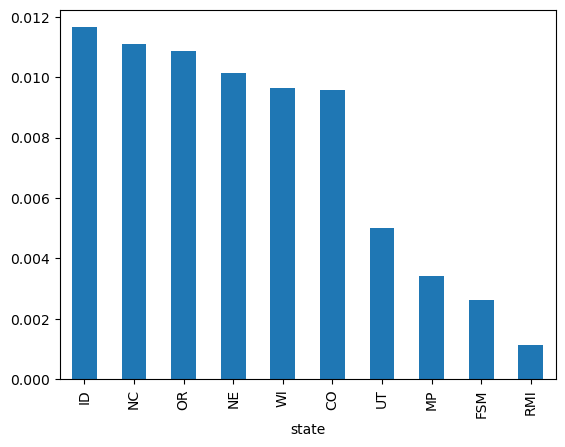

In [40]:
#the state with the highest cure ratio is Republic of the Marshall Islands (RMI)
ratio.tail(10).plot.bar()
plt.show()

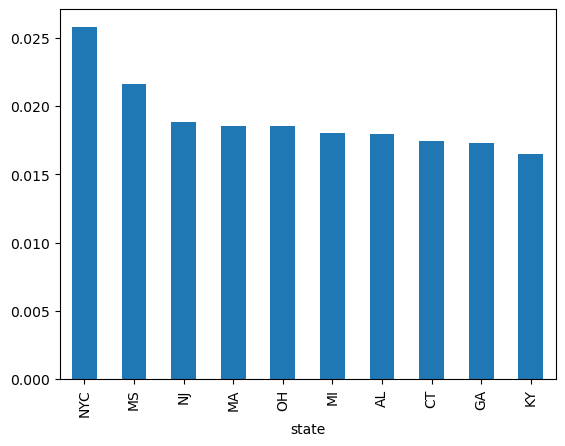

In [41]:
#Hence the state with the lowest cure ratio is New York City (NYC)
ratio.head(10).plot.bar()
plt.show()

# To check for Correlation Matrix among the variables

In [42]:
filt.corr(method="pearson")

conf_cases  new_case  conf_death  prob_death  new_death
conf_cases    1.000000  0.306788    0.920685    0.555926   0.217608
new_case      0.306788  1.000000    0.301670    0.147414   0.438857
conf_death    0.920685  0.301670    1.000000    0.591821   0.249243
prob_death    0.555926  0.147414    0.591821    1.000000   0.059806
new_death     0.217608  0.438857    0.249243    0.059806   1.000000

<AxesSubplot:>

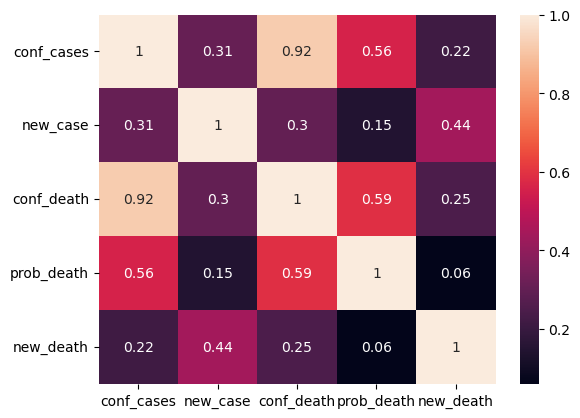

In [43]:
#the heatmap for the filtered dataset
sns.heatmap(filt.corr(method="pearson"), annot=True)

In [44]:
comparison_of_ten.corr(method="pearson")

conf_cases  conf_death  new_case  new_death
conf_cases    1.000000    0.445998  0.805100   0.530905
conf_death    0.445998    1.000000  0.436711   0.537334
new_case      0.805100    0.436711  1.000000   0.854909
new_death     0.530905    0.537334  0.854909   1.000000

<AxesSubplot:>

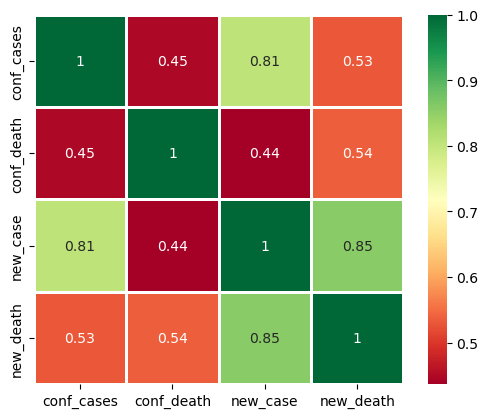

In [45]:
#heat for the top ten states with covid cases
sns.heatmap(comparison_of_ten.corr(method="pearson"), annot=True, cmap='RdYlGn', linewidth=1, linecolor='w', square=True)

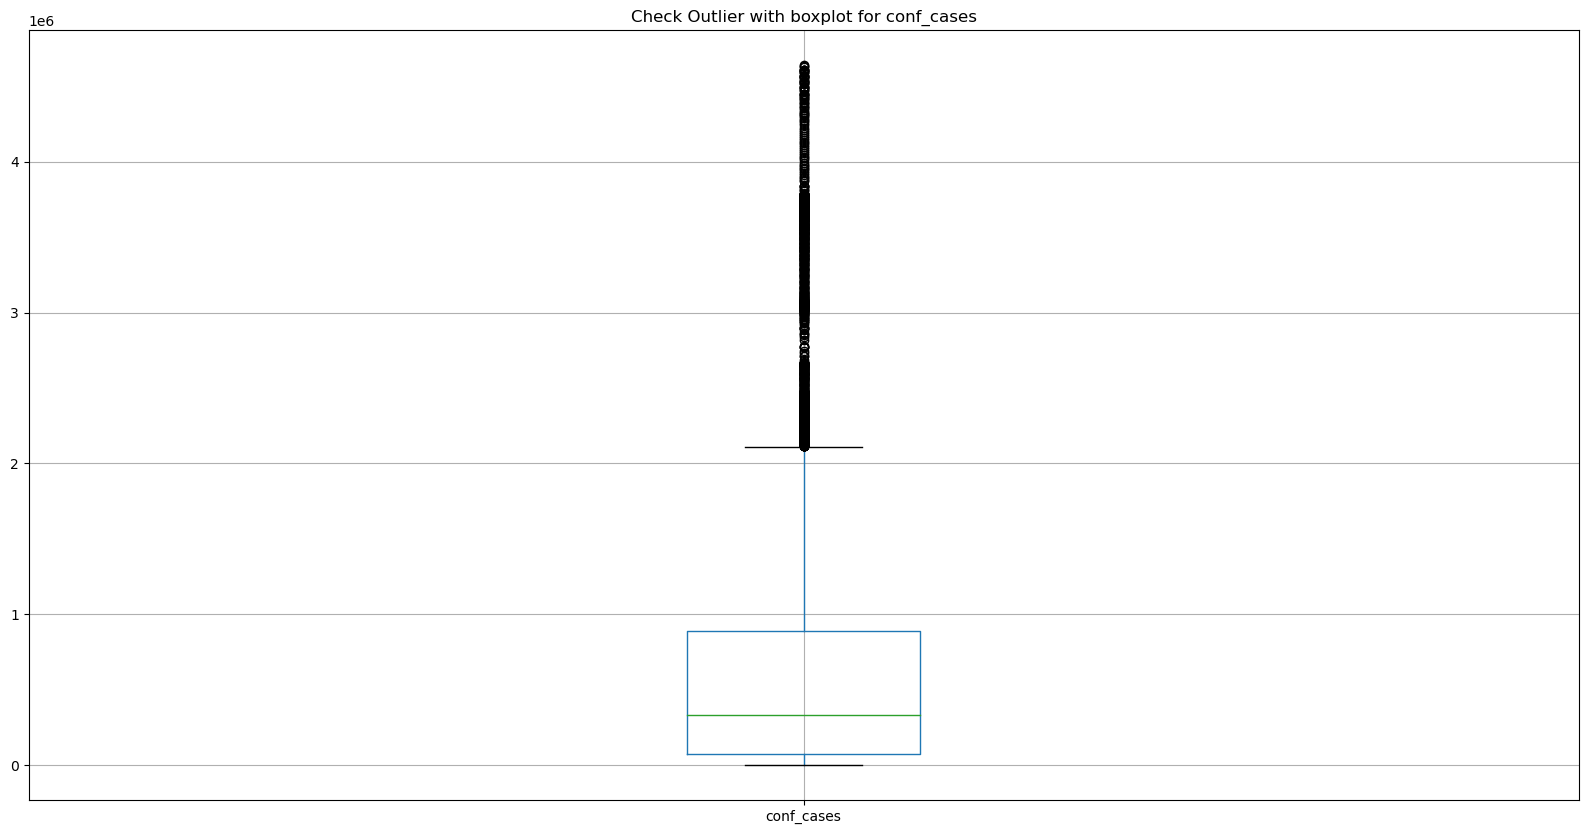

In [46]:
#checking for outliers in the confirmed cases
plt.figure(figsize = (20, 10))
plt.title('Check Outlier with boxplot for conf_cases')
filt.boxplot(column=['conf_cases']);

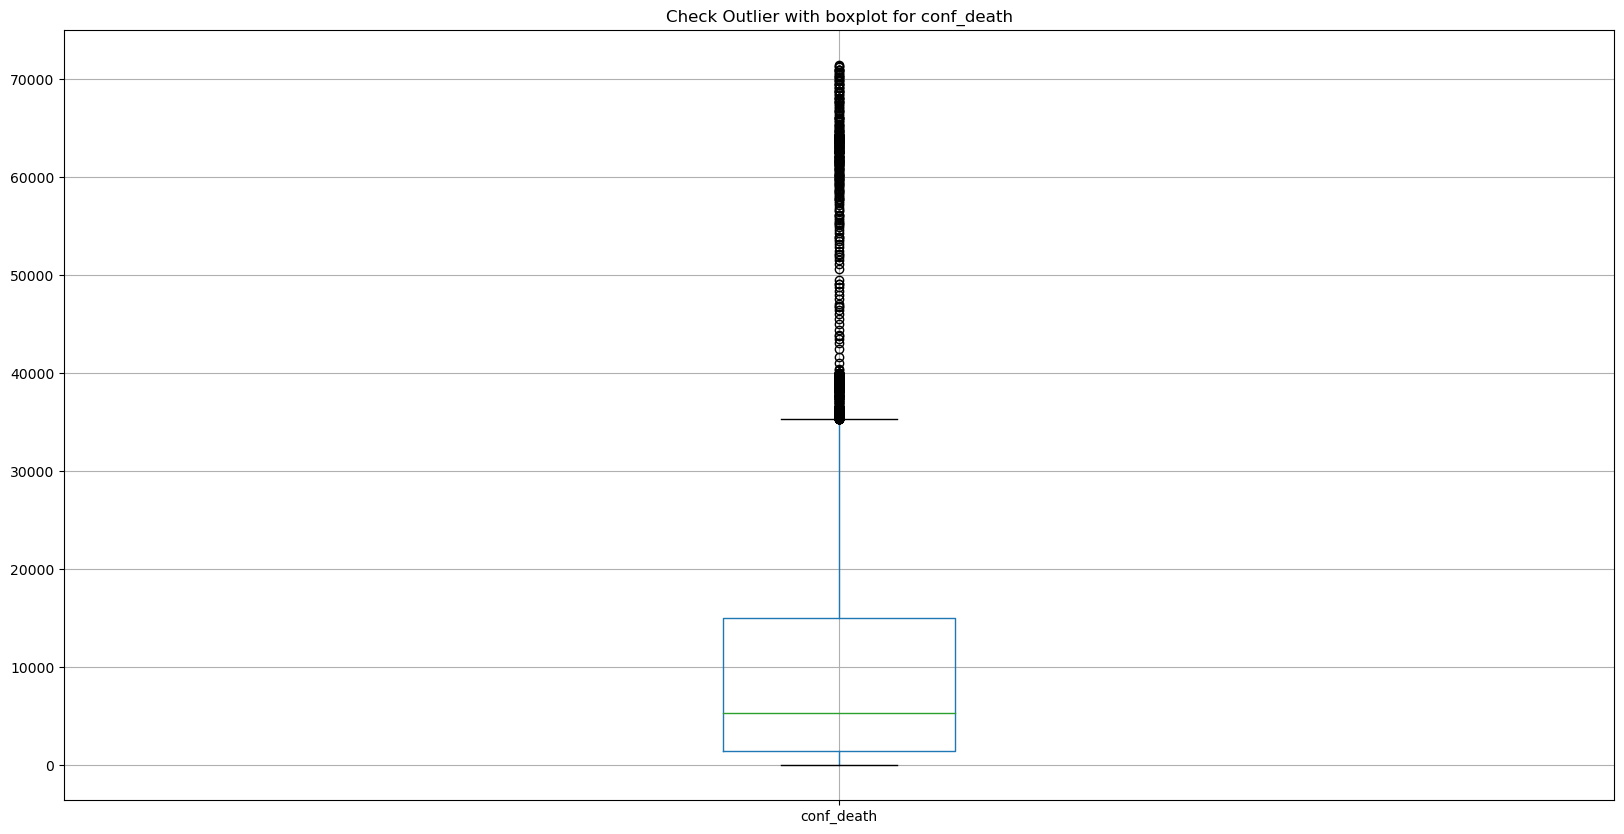

In [47]:
#checking for outliers in the confirmed death
plt.figure(figsize = (20, 10))
plt.title('Check Outlier with boxplot for conf_death')
filt.boxplot(column=['conf_death']);

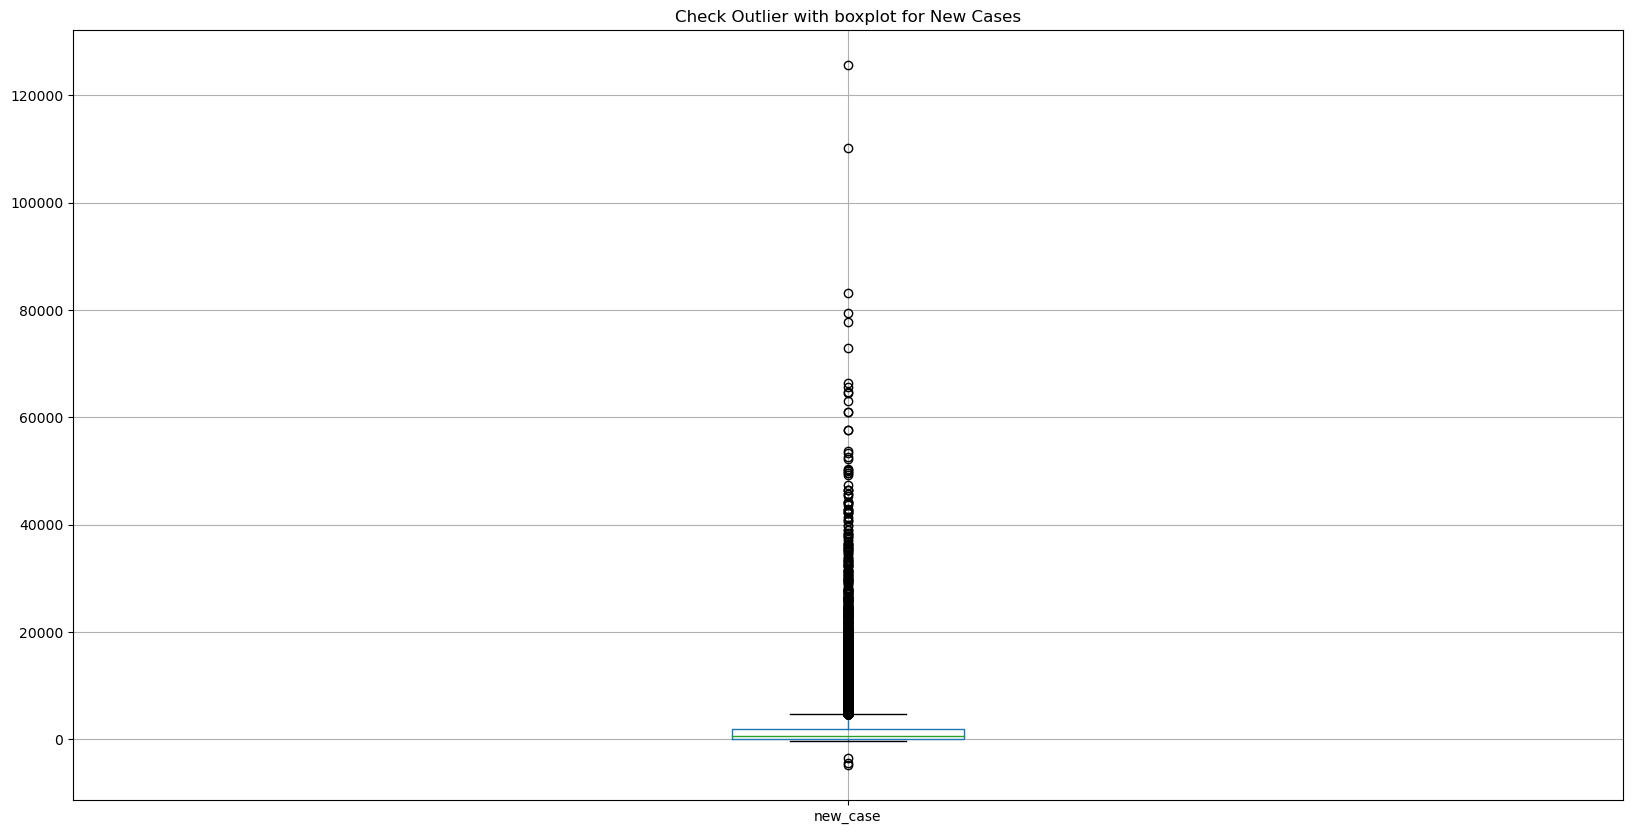

In [48]:
#checking for outliers in the New Cases
plt.figure(figsize = (20, 10))
plt.title ('Check Outlier with boxplot for New Cases')
filt.boxplot(column = ['new_case']);

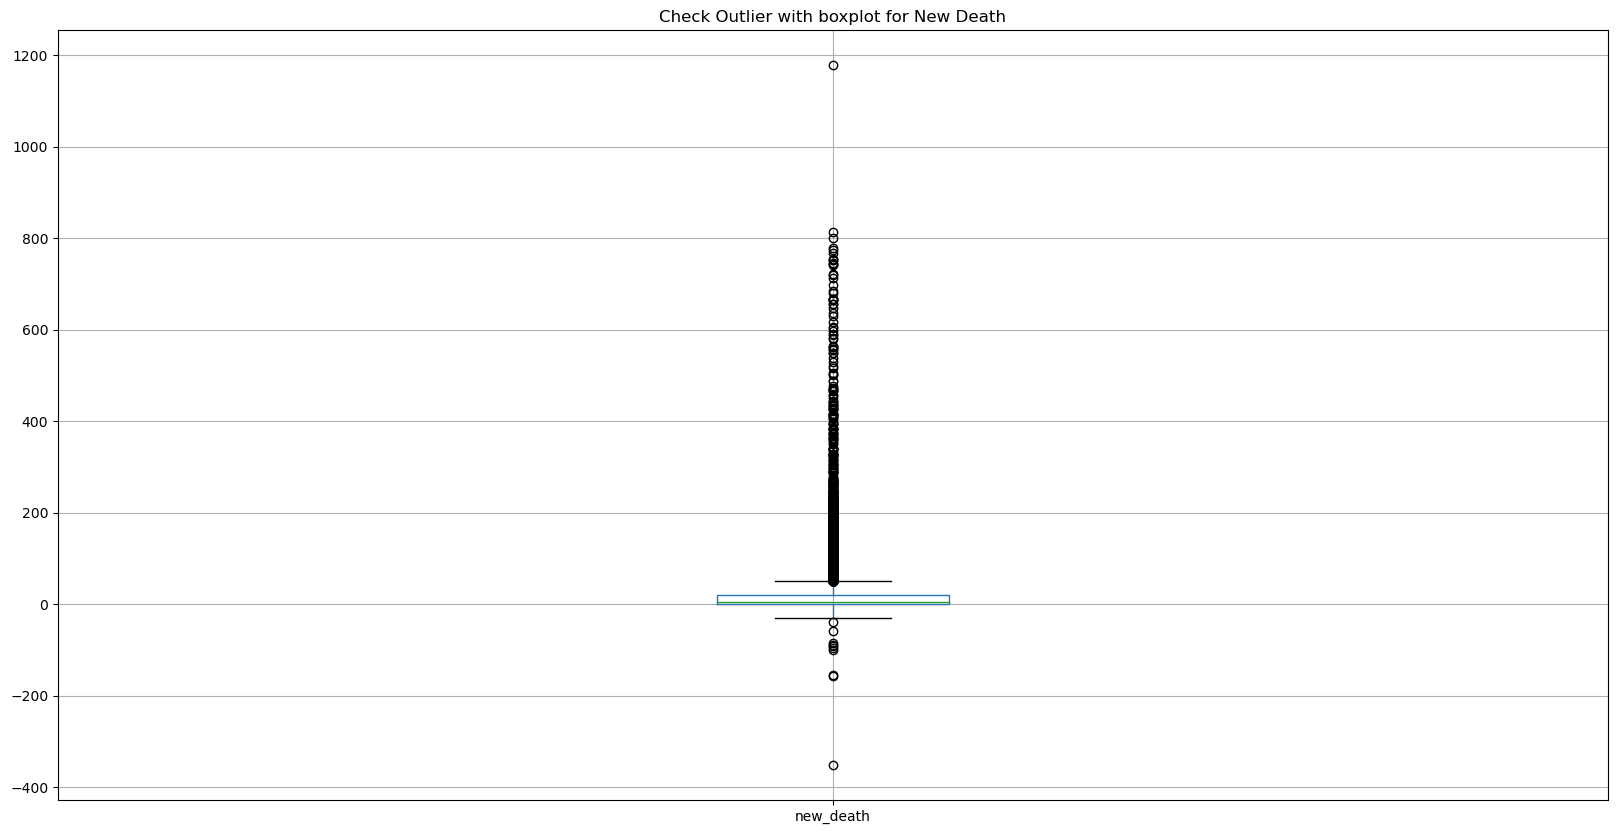

In [49]:
#checking for Outliers for New Death
plt.figure(figsize=(20, 10))
plt.title('Check Outlier with boxplot for New Death')
filt.boxplot(column = ['new_death']);

# Showing regressional plot between confirmed cases and confirmed death of the US covid cases

[Text(0.5, 0, 'Total Deaths'),
 Text(0, 0.5, 'Total Cases'),
 Text(0.5, 1.0, 'US Covid Cases')]

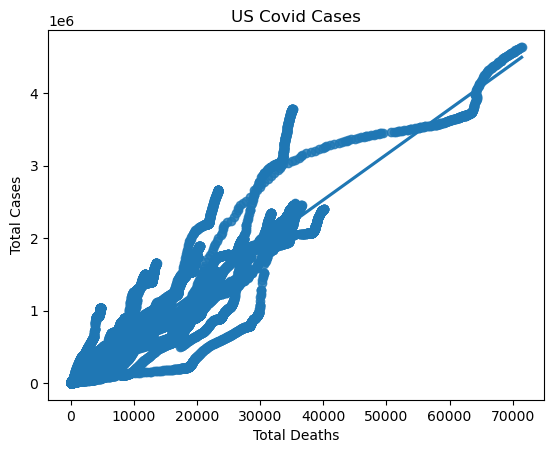

In [50]:
myPlotData = sns.regplot(x='conf_death', y='conf_cases', data=filt)
myPlotData.set(xlabel="Total Deaths", ylabel="Total Cases", title="US Covid Cases")

[Text(0.5, 0, ' New Cases'),
 Text(0, 0.5, ' New Deaths'),
 Text(0.5, 1.0, 'US Covid Cases')]

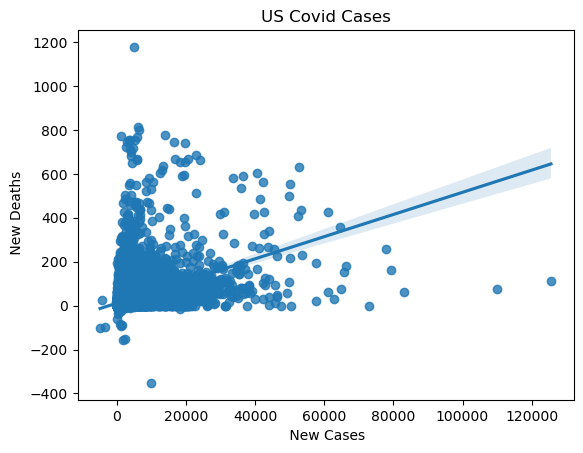

In [51]:
#checking the regressional plot between new case and new death
myPlotData = sns.regplot(x='new_case', y='new_death', data=filt)
myPlotData.set(xlabel=" New Cases", ylabel=" New Deaths", title="US Covid Cases")